# Decision Trees

In [42]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error

In [2]:
#import imputed dataset
df = pd.read_csv("data/imputed_dataset_no_censoring_26022018")

In [4]:
#drop the extra Unnamed:0 column created by MICE imputation
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [5]:
#specify categorical variables coded as numbers as such, to avoid pandas reading them as continuous ones
df.columns

Index(['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'Age_surgery', 'life_expectancy', 'IDH', 'TERT',
       'IDH_TERT', 'X1p19q_codel', 'IK'],
      dtype='object')

In [7]:
df['Tumor_grade'] = pd.to_numeric(df['Tumor_grade'].astype('category'))
df['IDH_TERT'] = pd.to_numeric(df['IDH_TERT'].astype('category'))
df['X1p19q_codel'] = pd.to_numeric(df['X1p19q_codel'].astype('category'))

In [10]:
#create dataset with dummy variables
#specify all categorical variables as otherwise .get_dummies() will still ignore IDH_TERT/Tumor_grade etc.
df_dum = pd.get_dummies(df, columns = ['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'IDH', 'TERT',
       'IDH_TERT', 'X1p19q_codel'])

In [11]:
#check
df_dum.columns

Index(['Age_surgery', 'life_expectancy', 'IK', 'Gender_F', 'Gender_M',
       'Tumor_type_GBM', 'Tumor_type_astrocytome',
       'Tumor_type_astrocytome gémistocytique (=A2)',
       'Tumor_type_astrocytome pilocytique', 'Tumor_type_gangliogliome',
       'Tumor_type_gliome', 'Tumor_type_oligo', 'Tumor_grade_1',
       'Tumor_grade_2', 'Tumor_grade_3', 'Tumor_grade_4', 'Gene_P53_ALTERE',
       'Gene_P53_NC', 'Gene_P53_NORMAL', 'Gene_Mgmt_METHYLE',
       'Gene_Mgmt_NON METHYLE', 'Gene_Egfr_AMPLIFIE', 'Gene_Egfr_NORMAL',
       'Gene_Mdm2_AMPLIFIE', 'Gene_Mdm2_NORMAL', 'Gene_Cdk4_AMPLIFIE',
       'Gene_Cdk4_NORMAL', 'Gene_P16_DELETE', 'Gene_P16_NORMAL',
       'Gene_Ihc_Atrx_Extinction diffuse', 'Gene_Ihc_Atrx_Maintien',
       'Gene_Ihc_Atrx_extinction', 'Gene_Ch10Q_NON PERTE', 'Gene_Ch10Q_PERTE',
       'Gene_Ch9P_GAIN', 'Gene_Ch9P_NON PERTE', 'Gene_Ch9P_PERTE',
       'Tumor_Location_A', 'Tumor_Location_B', 'Tumor_Location_C',
       'Tumor_Location_N', 'Tumor_Location_autre', 'Tum

In [14]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [16]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1773, 60), (313, 60), (1773,), (313,))

In [20]:
#now separate the training set into training and validation
training_set = pd.concat([X_train, Y_train], axis = 1)

In [21]:
training_set.shape

(1773, 61)

In [22]:
r, c = training_set.shape

In [23]:
i_cols = []
for i in range(0, c-1):
    i_cols.append(i)

In [54]:
i_cols_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [27]:
#separate target column and rest
X = training_set.iloc[:,0:(c-1)]
Y = training_set.iloc[:,(c-1)]

In [29]:
X.shape, Y.shape

((1773, 60), (1773,))

In [30]:
#validation set size
val_size = 0.1

In [36]:
#use a common seed
seed = 0

In [38]:
#Split the data
X_train_2, X_val, Y_train2, Y_val = cross_validation.train_test_split(X, Y, 
                                                                     test_size = val_size, 
                                                                      random_state = seed)

In [40]:
#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms
mae = []

In [43]:
#Add this version of X to the list
n = "All"
X_all.append([n, i_cols])

In [44]:
X_all

[['All',
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59]]]

# Linear regression

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression(n_jobs = -1)
algo = "LR"

In [95]:
for name, i_cols_list in X_all:
    model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

All 605.629206462


In [92]:
Y_train2.dtype

dtype('int64')

In [101]:
Y_val.shape, X_val.iloc[:, 5].shape

((178,), (178,))

In [102]:
for i in range(5, 60):
    model.fit(X_train_2.iloc[:, 59].to_frame(), Y_train2.to_frame())
    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i:59]))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

ValueError: shapes (178,54) and (1,1) not aligned: 54 (dim 1) != 1 (dim 0)

In [69]:
mae, comb

([605.62920646158989,
  605.62920646158989,
  605.62920646158989,
  605.62920646158989,
  605.62920646158989],
 ['LR', 'LR', 'LR', 'LR', 'LR'])

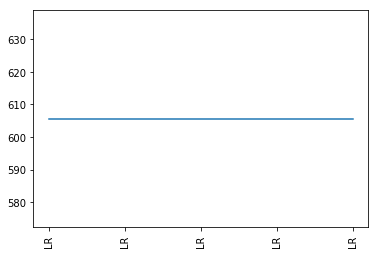

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
fix, ax = plt.subplots()
plt.plot(mae)

#Set tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

#plot accuracy of all combinations
plt.show()